In [273]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

# read the dataframe
df = pd.read_csv('train.csv')
f = lambda x : 0 if ( x != x) else 1;
df['Cabin'] = df['Cabin'].apply(f)

df.head()

df[df['Fare'] == 0]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,0,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,1,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,0,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,0,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,0,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,0,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,0,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,0,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,0,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,0,S


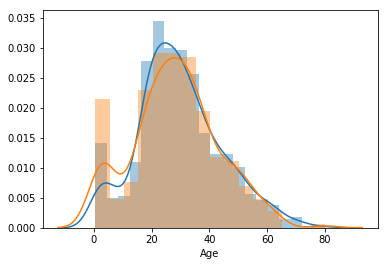

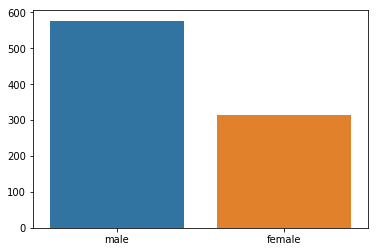

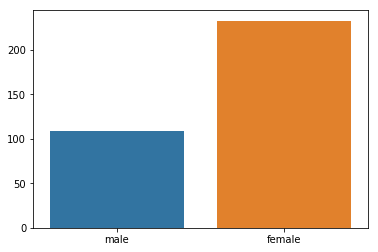

Percentage of male survivors out of male population %= 18.890814558058924
Percentage of male survivors out of female population %= 74.20382165605095


In [112]:
import sklearn.preprocessing as prep
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer

import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

# distribution by age
dp=sns.distplot(df['Age'].dropna())
sns.distplot(df.where(df.Survived==1)["Age"].dropna())

plt.show()
#dist by sex
res = pd.value_counts(df['Sex'])
sp = sns.barplot(res.index, res.values,order=['male', 'female'])

plt.show()

res2 = pd.value_counts(df.where(df.Survived==1)['Sex'])
sp = sns.barplot(res2.index, res2.values, order=['male', 'female'])

plt.show()

per_male   = res2["male"]/res["male"]
per_female = res2["female"]/res["female"]
print( "Percentage of male survivors out of male population %=", per_male * 100 )
print( "Percentage of male survivors out of female population %=", per_female * 100 )

The distribution of survivors by age shows almost the same as the distirbution of passengers by age with a bit of a difference at lower ages which indicates that children were more probable to survive

The female/male ratio of survivors is in reverse proportion with the passenger which shows women had a higher chance of survival, approx 74% vs  male with 19 %



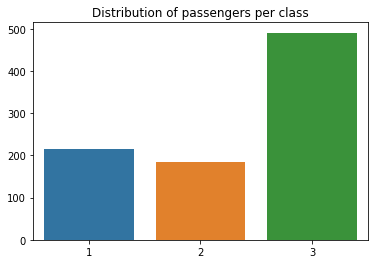

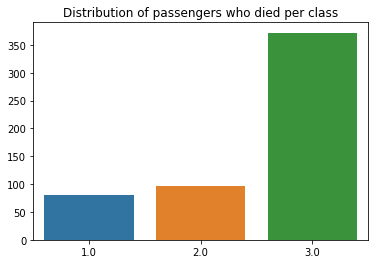

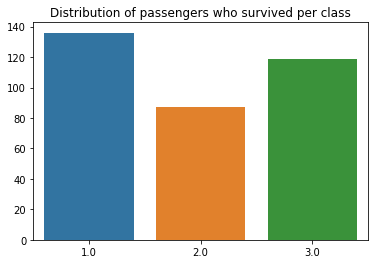

In [114]:
# total distribution / class

res2 = pd.value_counts(df['Pclass'])
sp = sns.barplot(res2.index, res2.values)
plt.title('Distribution of passengers per class')
plt.show()

res2 = pd.value_counts(df.where(df.Survived==0)['Pclass'])
sp = sns.barplot(res2.index, res2.values)
plt.title('Distribution of passengers who died per class')
plt.show()

res2 = pd.value_counts(df.where(df.Survived==1)['Pclass'])
sp = sns.barplot(res2.index, res2.values, data=df)
plt.title('Distribution of passengers who survived per class')

plt.show()

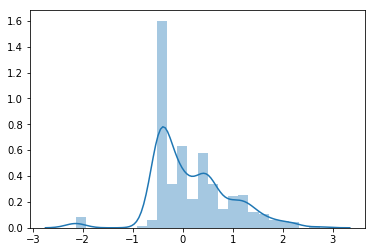

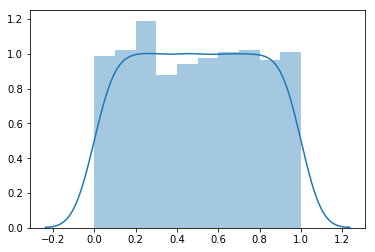

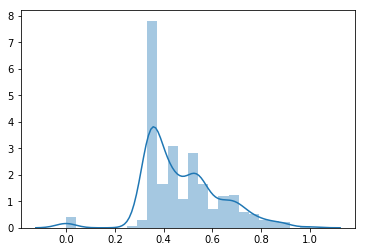

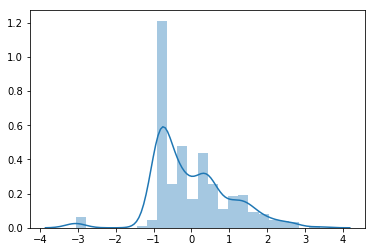

In [272]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# distribution by age
fare = df['Fare'].dropna().values.reshape(-1,1)
fare=np.log(fare+1)
scaledFare = RobustScaler().fit_transform(fare)
sns.distplot(scaledFare)
plt.show()

rsFare = QuantileTransformer().fit_transform(fare)
sns.distplot(rsFare)
plt.show()

rsFare = MinMaxScaler().fit_transform(fare)
sns.distplot(rsFare)
plt.show()

stdScaled = StandardScaler().fit_transform(fare)
sns.distplot(stdScaled)
plt.show()


In [4]:
correlation = df.corr()
correlation

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [87]:
from sklearn.base import BaseEstimator, TransformerMixin

class AgeImputer(BaseEstimator, TransformerMixin) :
    titleAgeDictionary={'Master':0, 'Miss':0, 'Mr.':0, 'Mrs':0}
        
    def fit(self, X, y=None):
        for key in self.titleAgeDictionary.keys():
            self.titleAgeDictionary[key] = df[(df['Name'].str.contains(key))]["Age"].median()
            
        self.titleAgeDictionary['any'] = df['Age'].median()        
        return self
    
    def findAge(self, r) :
        if (r['Age'] > 0):
            return r
        for key in self.titleAgeDictionary.keys():
            if (r['Name'].find(key) != -1):
                r["Age"]=self.titleAgeDictionary[key]
                return r;
        r['Age'] = self.titleAgeDictionary['any']
        return r
        
    def transform(self, X, y=None):        
        return X.apply(self.findAge, axis=1)
        
    

In [239]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


transformer = AgeImputer()

df = transformer.fit_transform(df)

df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

df['Embarked'] = df['Embarked'].fillna('U')

df = pd.get_dummies( df, {'Sex' : 'sex', 'Cabin' : 'cabin', 'Pclass' : 'class', 'Embarked' : 'Embarked'}, 
                       columns=['Sex', 'Cabin', 'Pclass', 'Embarked'])



In [240]:
# drop the columns I don't need
try:
    df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)
except:
    pass



In [246]:
from sklearn.pipeline import Pipeline



sklearn.utils.Bunch